# Simulation of HPL on Dahu

In [1]:
import io
import zipfile
import pandas
from plotnine import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # removing annoying Pandas warning

def read_result(name):
    archive = zipfile.ZipFile(name)
    return pandas.read_csv(io.BytesIO(archive.read('results.csv')))

simulation_file = 'grenoble_2018-09-24_1809767.zip'
df1 = read_result(simulation_file)
df1['simulation'] = True
df2 = pandas.concat([
    read_result('../hpl/grenoble_2018-09-05_1809107.zip'),
    read_result('../hpl/grenoble_2018-09-12_1809240.zip'),
])
df2['simulation'] = False
df = pandas.concat([df1, df2])
max_size = min(df1.matrix_size.max(), df2.matrix_size.max())
df = df[df.matrix_size <= max_size]
df.head()

/home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,application_time,bcast,block_size,cpu_utilization,depth,dgemm_coefficient,dgemm_intercept,dtrsm_coefficient,dtrsm_intercept,gflops,...,process_per_node,residual,rfact,simulation,simulation_time,swap,sys_time,thread_per_process,time,usr_time
0,18.85910,2,128,0.99,1,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07,6339.0,...,32,NaN,2,True,176.0940,0,14.00,1,1.56,161.66
1,4.23273,2,128,0.99,1,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07,612.4,...,32,NaN,2,True,39.4820,0,3.38,1,0.25,36.09
2,97.28630,2,128,0.94,1,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07,13680.0,...,32,NaN,2,True,929.8050,0,74.52,1,109.74,807.71
3,5.68526,2,128,0.99,1,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07,1076.0,...,32,NaN,2,True,52.7095,0,4.51,1,0.34,48.13
4,52.58900,2,128,0.99,1,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07,11790.0,...,32,NaN,2,True,482.3510,0,38.46,1,15.92,442.46


### Checking the parameters

In [2]:
df1[['dgemm_coefficient', 'dgemm_intercept', 'dtrsm_coefficient', 'dtrsm_intercept']].drop_duplicates()

,dgemm_coefficient,dgemm_intercept,dtrsm_coefficient,dtrsm_intercept
0,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07


In [3]:
name_exceptions = {'application_time', 'simulation_time', 'usr_time', 'sys_time', 'time', 'gflops', 'residual', 'cpu_utilization',
                   'dgemm_coefficient', 'dgemm_intercept', 'dtrsm_coefficient', 'dtrsm_intercept',
                   'major_page_fault', 'minor_page_fault', 'matrix_size', 'simulation'}
colnames = set(df) - name_exceptions
df[list(colnames)].drop_duplicates()

,depth,pfact,thread_per_process,proc_p,mem_align,bcast,rfact,swap,block_size,proc_q,process_per_node
0,1,1,1,16,8,2,2,0,128,32,32


In [4]:
print(zipfile.ZipFile(simulation_file).read('dahu.xml').decode('ascii'))

<?xml version="1.0"?>
<!DOCTYPE platform SYSTEM "http://simgrid.gforge.inria.fr/simgrid/simgrid.dtd">

<platform version="4.1">
    <config id="General">
        <prop id="smpi/os" value="0:2.9654918472829634e-07:9.636195922971908e-11;8133:0.0:0.0;15831:0.0:0.0;33956:0.0:0.0;63305:0.0:0.0"/>
        <prop id="smpi/or" value="0:1.3754300044375224e-06:8.456019002037343e-11;8133:0.0:0.0;15831:0.0:0.0;33956:0.0:0.0;63305:0.0:0.0"/>
        <prop id="smpi/ois" value="0:6.93122952108322e-07:7.051204536228499e-11;8133:3.601990790153314e-07:1.2449128895712003e-10;15831:2.977016881030904e-06:4.130261264964205e-11;33956:3.1334661540668004e-06:3.293458765282178e-11;63305:6.939993663604218e-07:0.0"/>
        <prop id="smpi/bw-factor" value="0:0.3252104998125028;8133:0.6770561715947873;15831:0.7091971477925826;33956:0.7033449540683548;63305:0.9867951082730284"/>
        <prop id="smpi/lat-factor" value="0:1.497059651044352;8133:2.984698135078078;15831:3.0274775156187763;33956:6.463917831305293;6330

### Comparing the simulation with the real execution

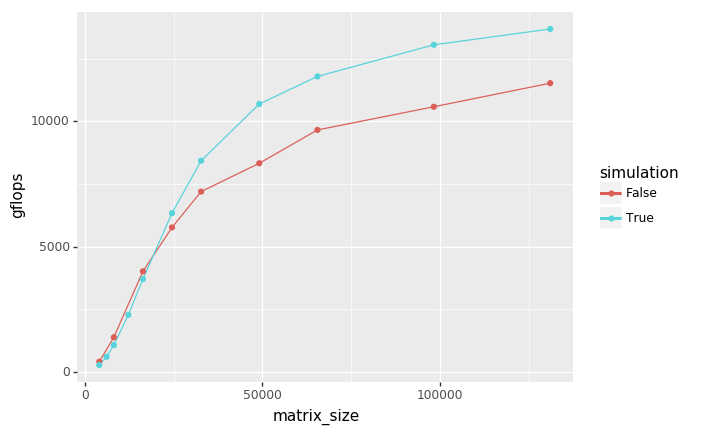

<ggplot: (-9223363295434450495)>

In [5]:
ggplot(df, aes(x='matrix_size', y='gflops', color='simulation')) + geom_line() + geom_point()

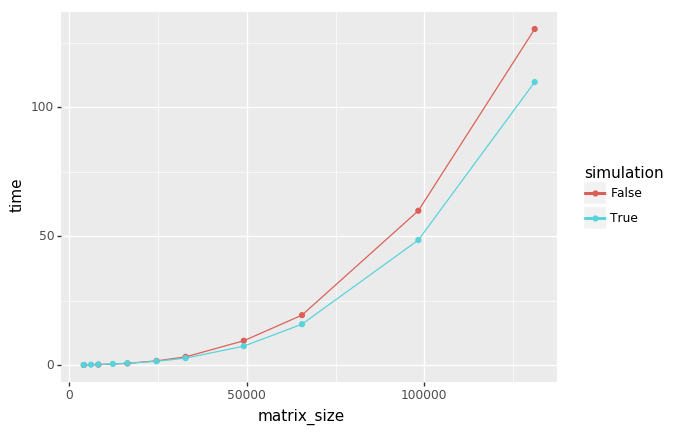

<ggplot: (-9223363295528510909)>

In [6]:
ggplot(df, aes(x='matrix_size', y='time', color='simulation')) + geom_line() + geom_point()

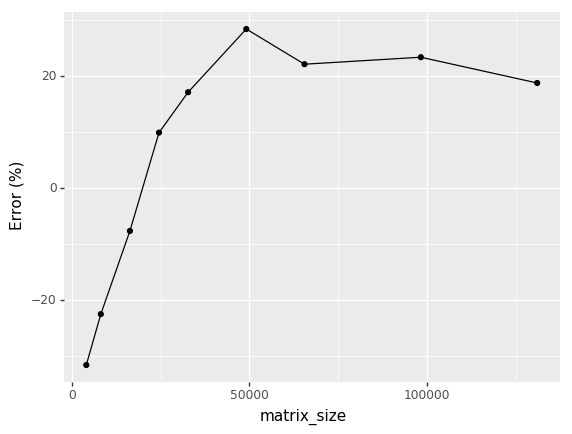

<ggplot: (-9223363295528558802)>

In [7]:
tmp = df1.set_index('matrix_size').join(df2.set_index('matrix_size'), rsuffix='_real').reset_index()
tmp['error'] = (tmp.gflops - tmp.gflops_real) / tmp.gflops_real * 100
tmp = tmp[~tmp.error.isna()]
ggplot(tmp, aes(x='matrix_size', y='error')) + geom_line() + geom_point() + ylab('Error (%)')

### Efficiency of the simulation

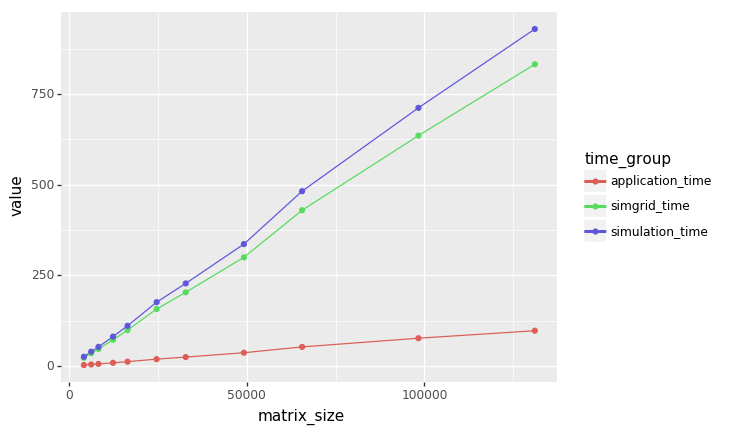

<ggplot: (8741326216996)>


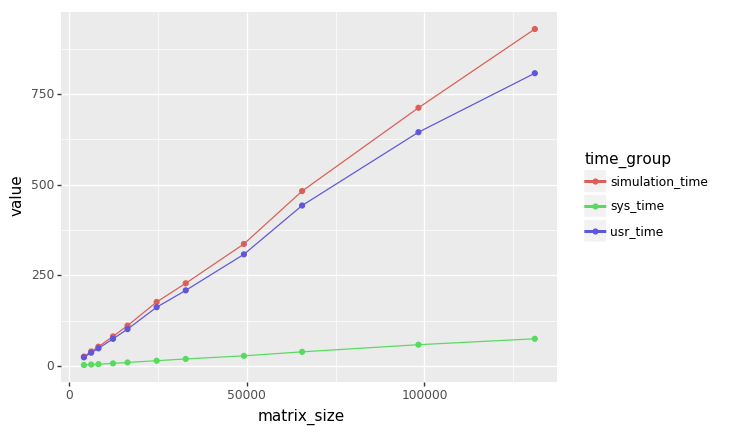

<ggplot: (8741328401044)>

In [8]:
df1['simgrid_time'] = df1.simulation_time - df1.application_time

print(ggplot(df1.melt(id_vars=['matrix_size'], value_vars=['simulation_time', 'application_time', 'simgrid_time'], var_name='time_group'),
       aes(x='matrix_size', y='value', color='time_group')) + geom_line() + geom_point())

ggplot(df1.melt(id_vars=['matrix_size'], value_vars=['simulation_time', 'usr_time', 'sys_time'], var_name='time_group'),
       aes(x='matrix_size', y='value', color='time_group')) + geom_line() + geom_point()